In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [13]:
df = pd.read_csv("USA_Housing.csv")
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake 

In [14]:
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [15]:
if 'Address' in df.columns:
    df = df.drop('Address', axis=1)


In [16]:
X = df.drop('Price', axis=1)
y = df['Price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}


In [20]:

results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    if name in ["Support Vector Regressor", "KNN Regressor"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, mse, rmse, r2])
    print(f"{name} completed!")


Training Linear Regression...
Linear Regression completed!

Training Decision Tree...
Decision Tree completed!

Training Random Forest...
Random Forest completed!

Training Support Vector Regressor...
Support Vector Regressor completed!

Training KNN Regressor...
KNN Regressor completed!


In [21]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])
print("\n=== Model Comparison Results ===")
print(results_df)



=== Model Comparison Results ===
                      Model            MAE           MSE           RMSE  \
0         Linear Regression   80879.097235  1.008901e+10  100444.060556   
1             Decision Tree  140823.962296  3.156801e+10  177673.892601   
2             Random Forest   94672.466511  1.446513e+10  120271.078563   
3  Support Vector Regressor  279130.869521  1.231600e+11  350941.559725   
4             KNN Regressor  102165.644834  1.607824e+10  126800.006943   

   R2 Score  
0  0.917997  
1  0.743417  
2  0.882428  
3 -0.001037  
4  0.869317  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14152\2866904314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2 Score", y="Model", data=results_df, palette="viridis")


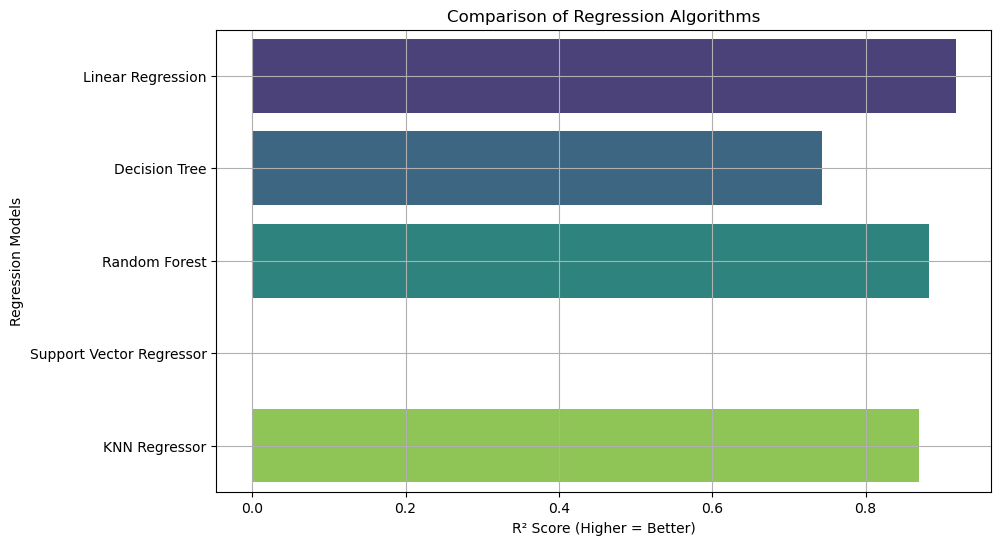

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x="R2 Score", y="Model", data=results_df, palette="viridis")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("R² Score (Higher = Better)")
plt.ylabel("Regression Models")
plt.grid(True)
plt.show()
